# Simulation vs Calculation

In [14]:
visitor_distribution <- rbinom(n = 1e6, size = 100, prob = 0.1)
mean(visitor_distribution == 13)

[1] 0.074479

In [15]:
# much faster
dbinom(13, size = 100, prob=0.1)

[1] 0.07430209

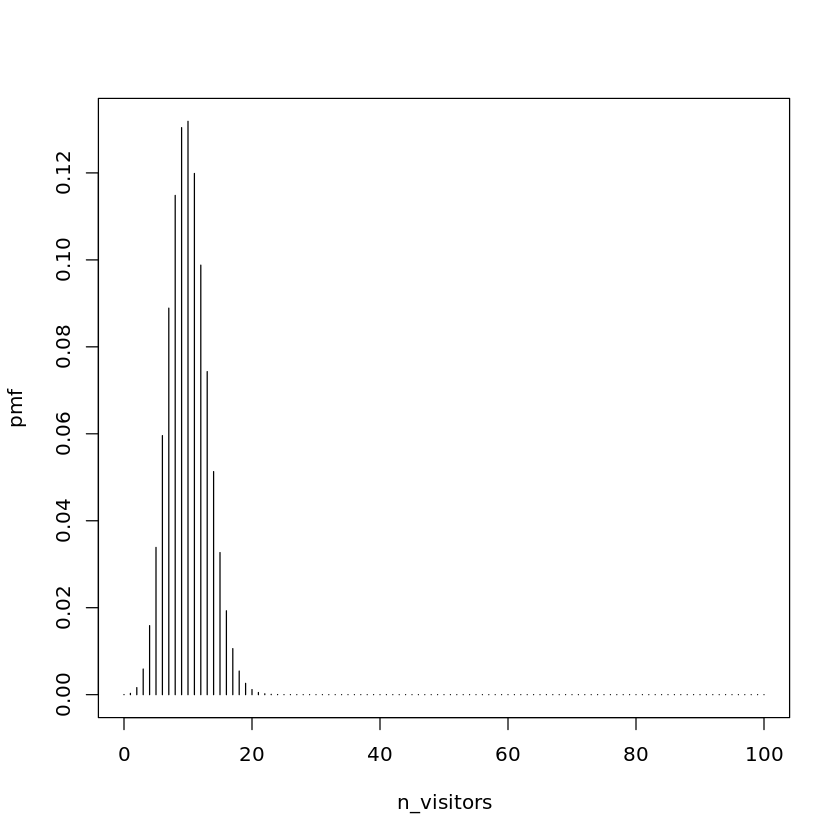

In [18]:
n_visitors <- seq(0,100,by=1)
pmf <- dbinom(n_visitors, size=100, prob=0.1)
plot(n_visitors, pmf, type="h")

# Bayesian inference

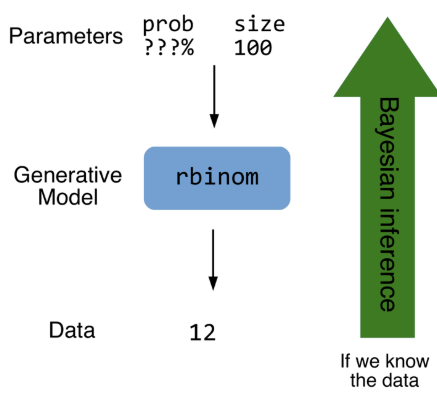

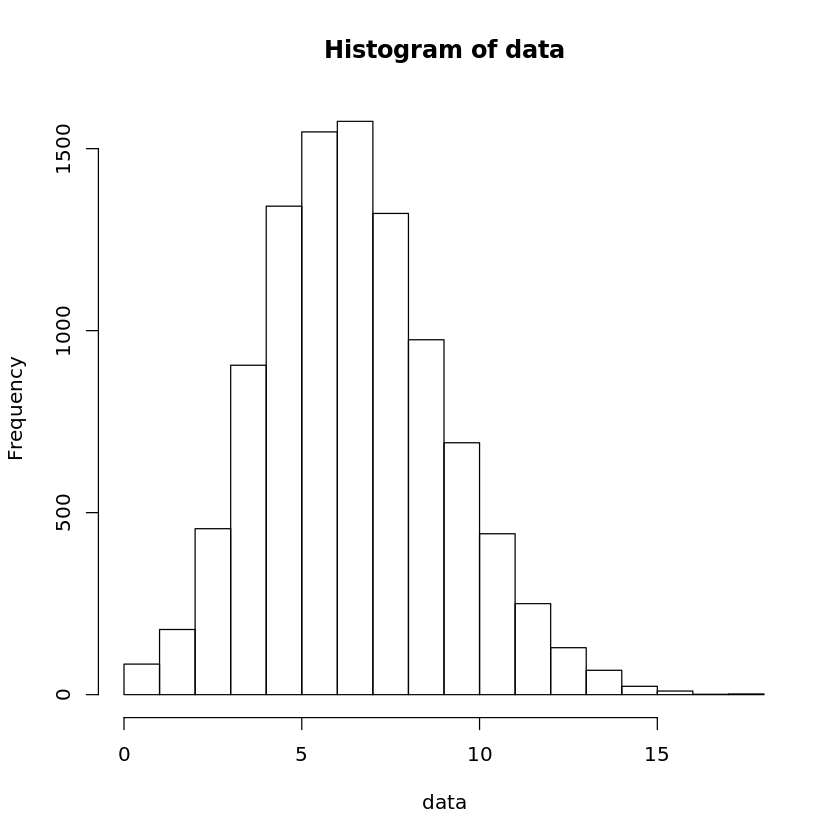

In [5]:
data <- rbinom(n = 10000, size = 100, p = 0.07)
hist(data)

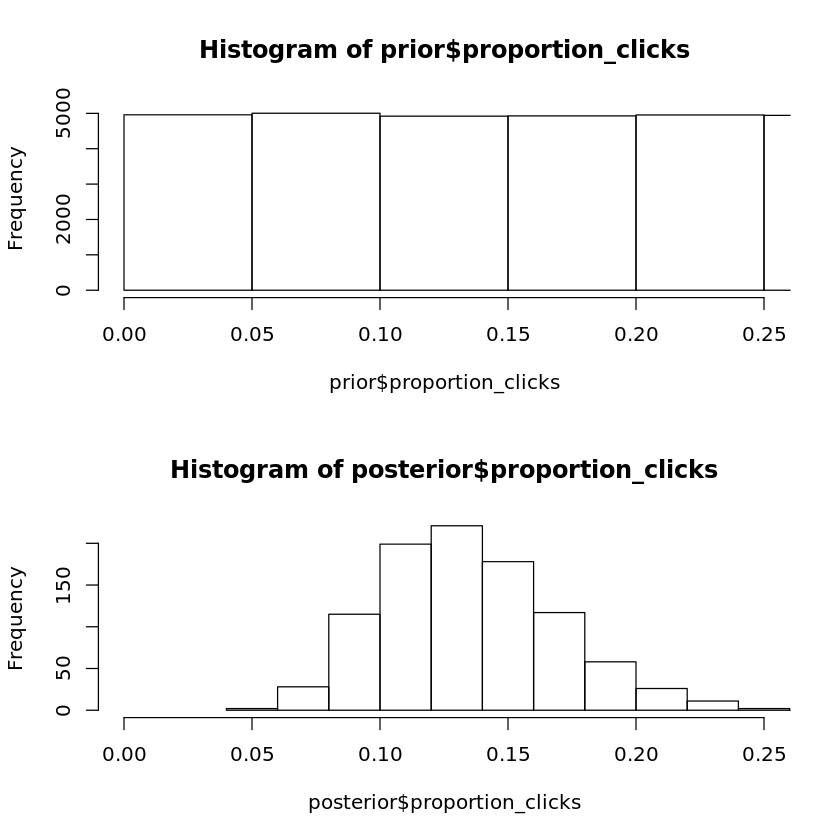

In [3]:
# what if the probability is unknow -> use distribution
n_draws <- 100000
n_ads_shown <- 100

# Change the prior on proportion_clicks
#suppose we know that prop is between 2% and 8%
proportion_clicks <-  runif(n = n_draws, min = 0.0, max = 1.0) # uninformative prior
n_visitors <-  rbinom(n_draws, size = n_ads_shown, prob = proportion_clicks)
prior <- data.frame(proportion_clicks, n_visitors)
posterior <- prior[prior$n_visitors == 13, ]

# This plots the prior and the posterior in the same plot
par(mfcol = c(2, 1))
hist(prior$proportion_clicks, xlim = c(0, 0.25))
hist(posterior$proportion_clicks, xlim = c(0, 0.25))

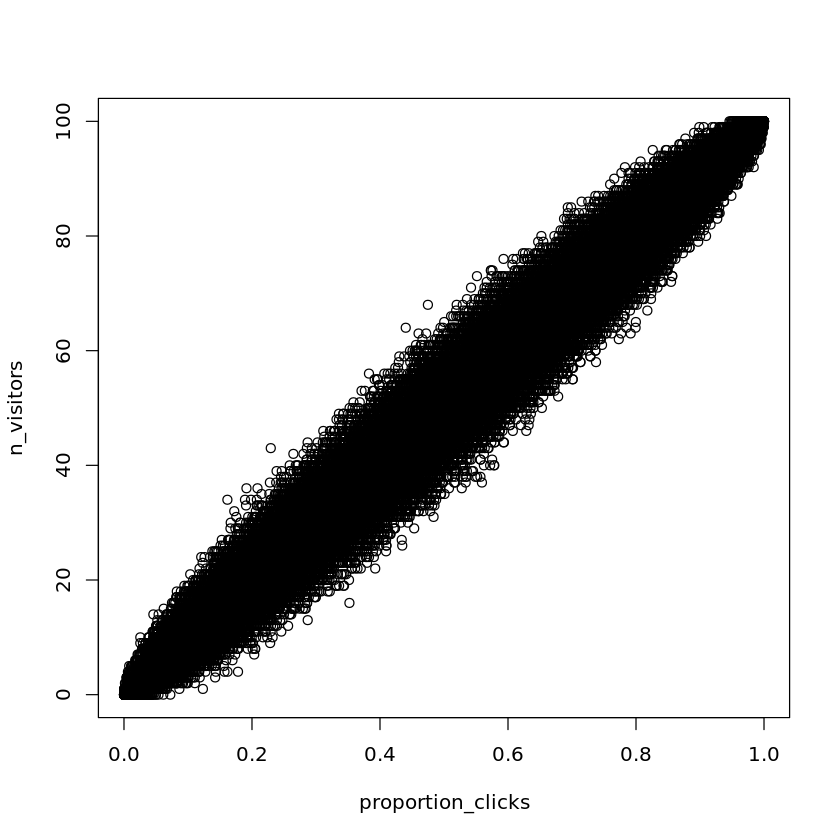

In [4]:
plot(prior)

[1] 0

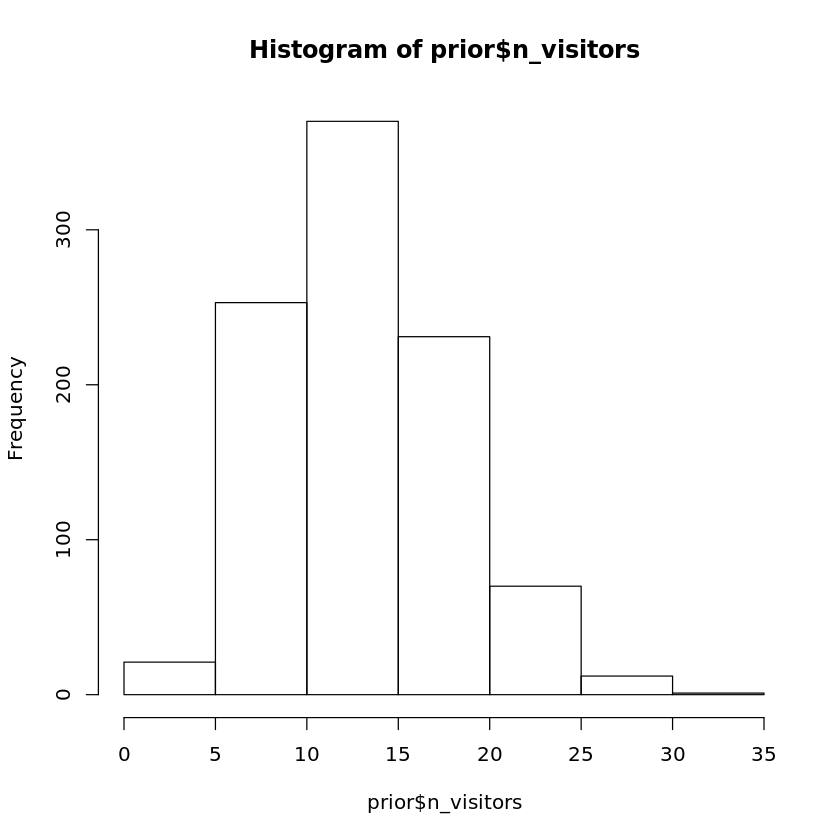

In [5]:
prior <- posterior

n_samples <-  nrow(prior)
n_ads_shown <- 100
prior$n_visitors <- rbinom(n_samples, size = n_ads_shown, prob = prior$proportion_clicks)
hist(prior$n_visitors)

# Calculate the probability that you will get 5 or more visitors
sum(prior$n_visitors >=35) / length(prior$n_visitors)

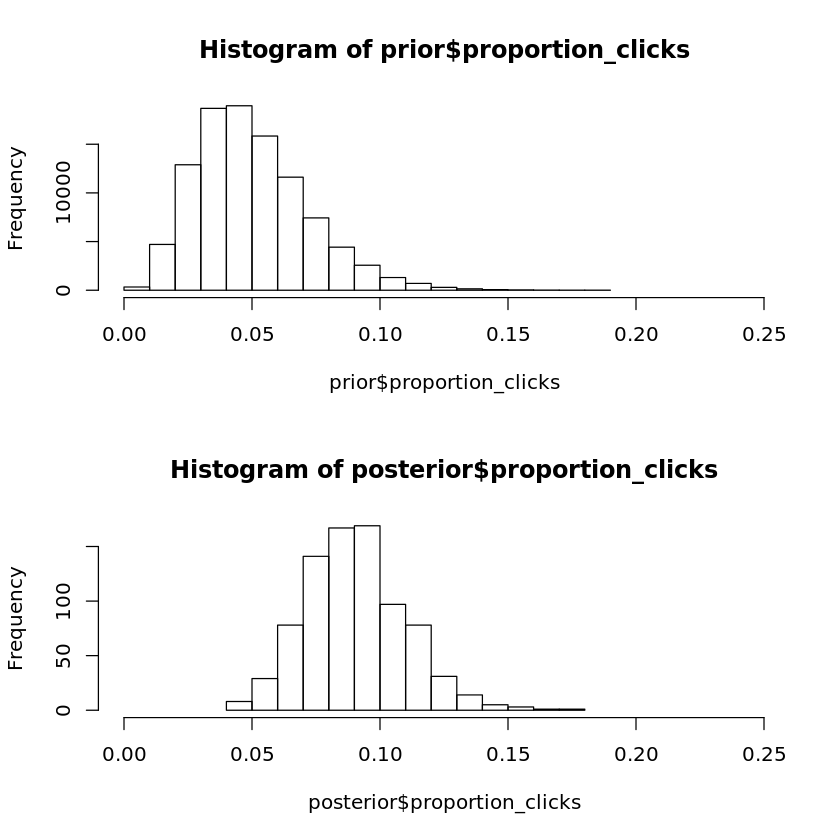

In [1]:
n_draws <- 100000
n_ads_shown <- 100

# Change the prior on proportion_clicks
#suppose we know that prop is between 2% and 8%
proportion_clicks <-  rbeta(n_draws, shape1 = 5, shape2 = 95) 
n_visitors <-  rbinom(n_draws, size = n_ads_shown, prob = proportion_clicks)
prior <- data.frame(proportion_clicks, n_visitors)
posterior <- prior[prior$n_visitors == 13, ]

# This plots the prior and the posterior in the same plot
par(mfcol = c(2, 1))
hist(prior$proportion_clicks, xlim = c(0, 0.25))
hist(posterior$proportion_clicks, xlim = c(0, 0.25))

## comparing groups

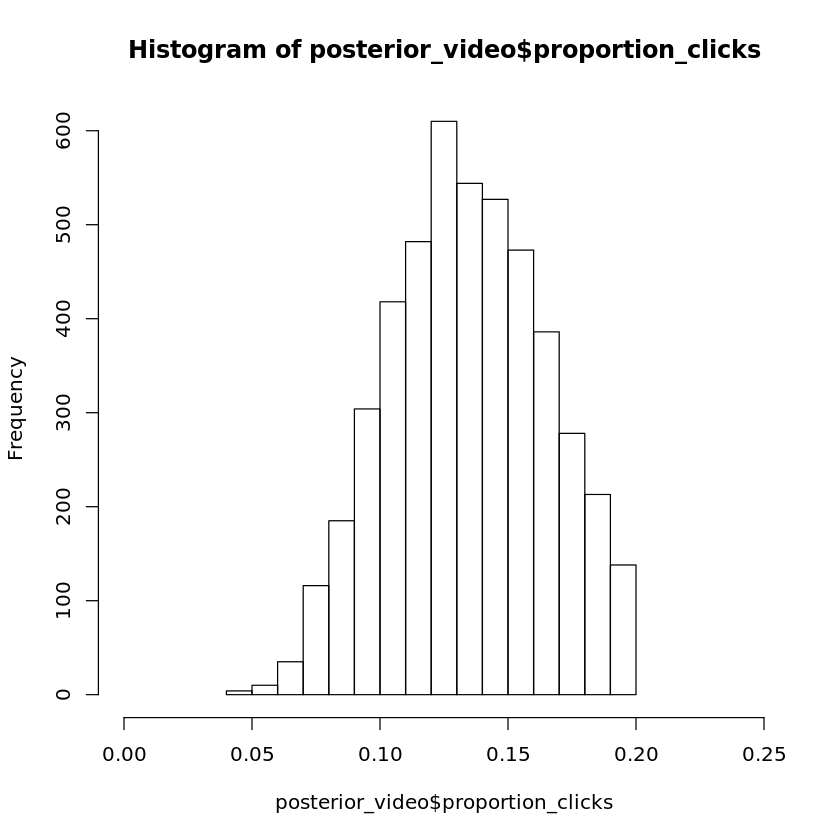

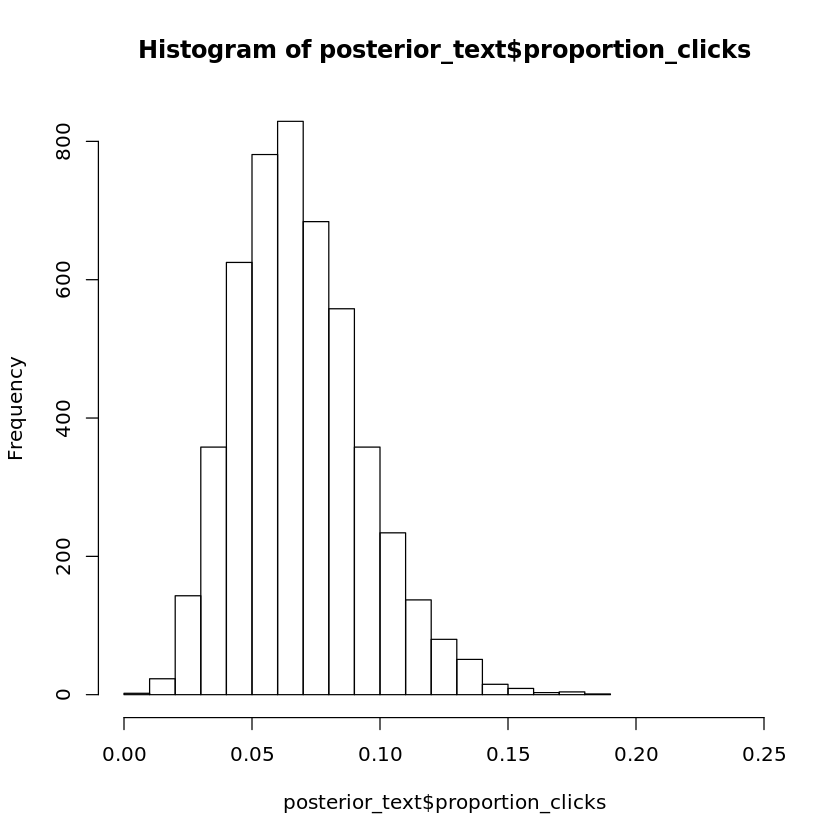

In [6]:
# Define parameters
n_draws <- 100000
n_ads_shown <- 100
proportion_clicks <- runif(n_draws, min = 0.0, max = 0.2)
n_visitors <- rbinom(n = n_draws, size = n_ads_shown, 
                     prob = proportion_clicks)
prior <- data.frame(proportion_clicks, n_visitors)

# Create the posteriors for video and text ads
posterior_video <- prior[prior$n_visitors == 13, ]
posterior_text <- prior[prior$n_visitors == 6, ]

# Visualize the posteriors
hist(posterior_video$proportion_clicks, xlim = c(0, 0.25))
hist(posterior_text$proportion_clicks, xlim = c(0, 0.25))

[1] 0.06532448

[1] 0.95025

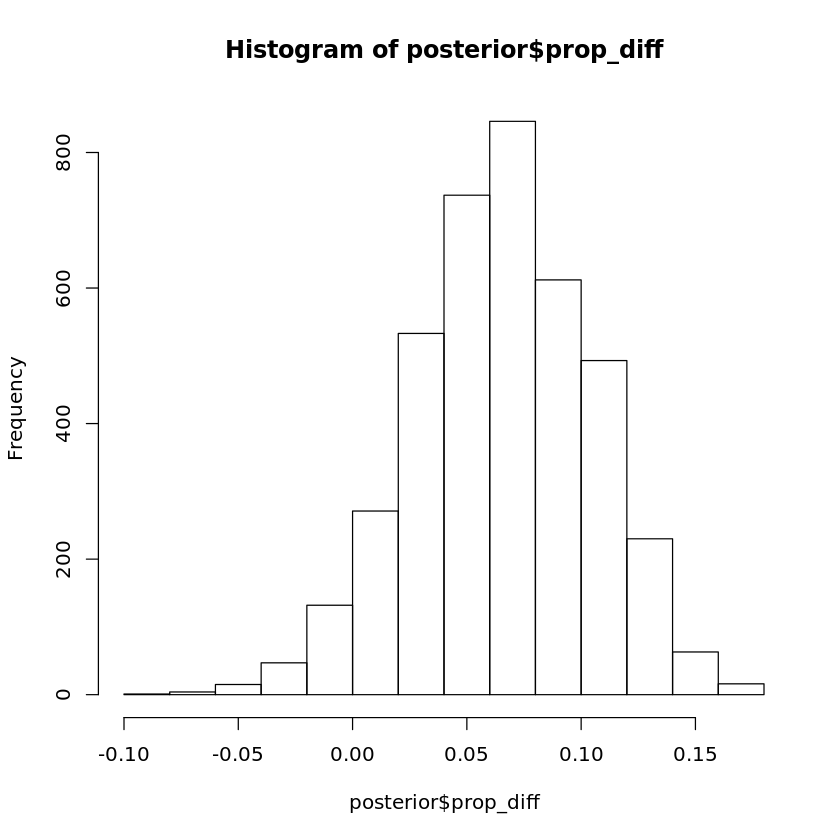

In [7]:
posterior <- data.frame(video_prop = posterior_video$proportion_clicks[1:4000],
                        text_prop = posterior_text$proportion_click[1:4000])

# Calculate the posterior difference: video_prop - text_prop
posterior$prop_diff <- posterior$video_prop - posterior$text_prop 

# Visualize prop_diff
hist(posterior$prop_diff)

# Calculate the median of prop_diff
median(posterior$prop_diff)

# Calculate the proportion
mean(posterior$prop_diff > 0)

## Decision analysis

[1] -0.03472908

[1] 0.637

[1] "there is a 63.7% prob that text ads are better"


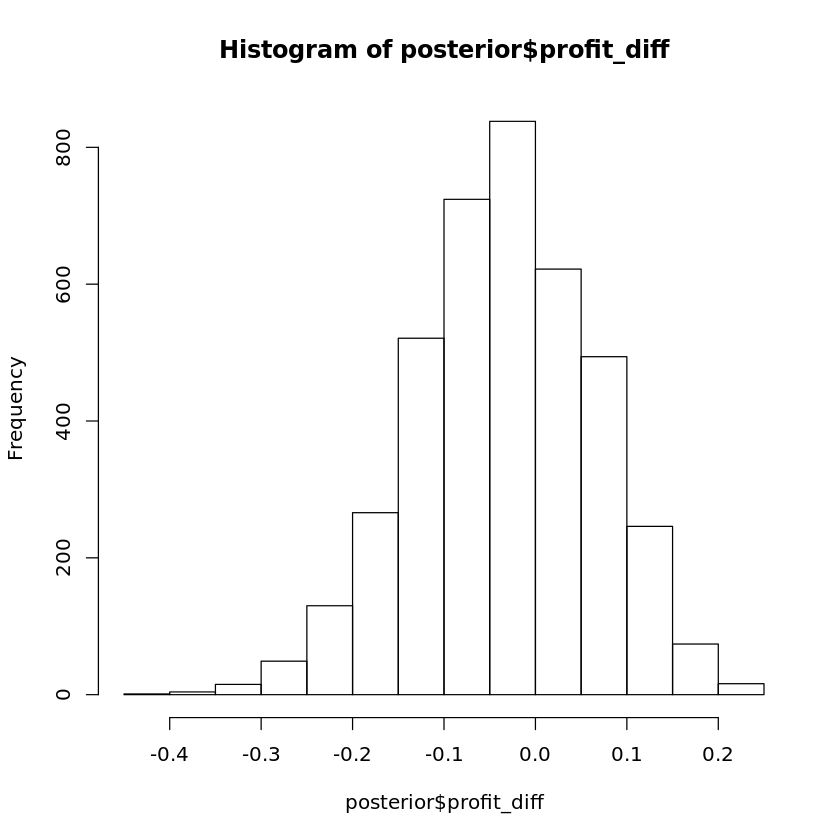

In [10]:
visitor_spend <- 2.53
video_cost <- 0.25
text_cost <- 0.05

# Add the column posterior$video_profit
posterior$video_profit <- posterior$video_prop * visitor_spend - video_cost

# Add the column posterior$text_profit
posterior$text_profit <- posterior$text_prop * visitor_spend - text_cost

# Add the column posterior$profit_diff
posterior$profit_diff <- posterior$video_profit - posterior$text_profit

# Visualize posterior$profit_diff
hist(posterior$profit_diff)

# Calculate a "best guess" for the difference in profits
median(posterior$profit_diff)

# Calculate the probability that text ads are better than video ads
mean(posterior$profit_diff < 0)

print("there is a 63.7% prob that text ads are better")

## Changing underlying model

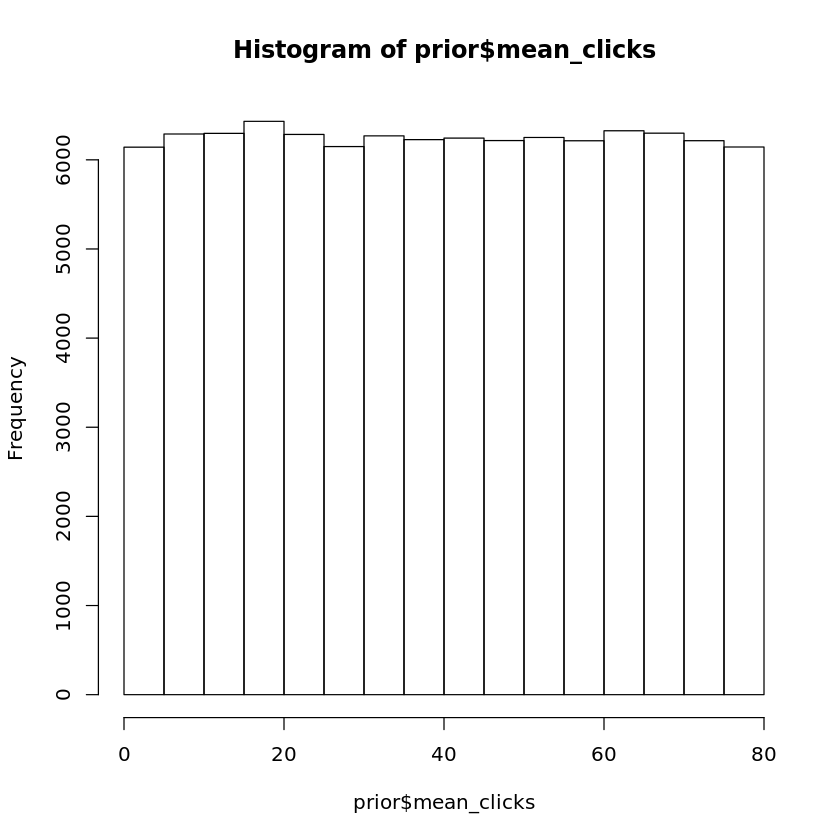

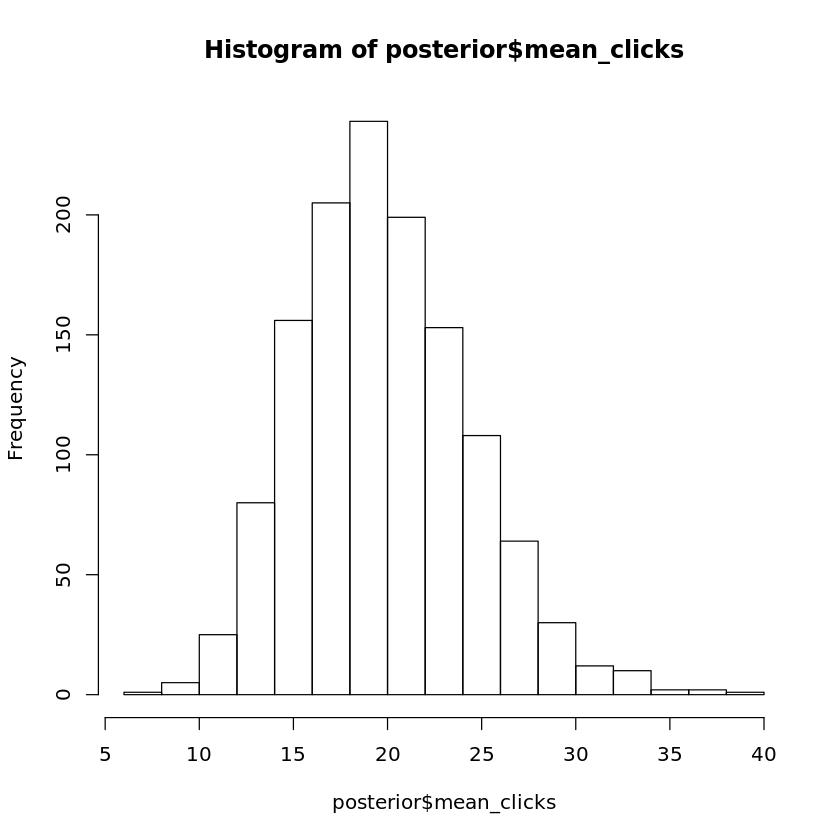

In [11]:
# imagine instead of paying each time you display an add, you can pay for a banner per day
# then it's not a binomial process but a poisson one
# Change the model according to instructions
n_draws <- 100000
mean_clicks <- runif(n_draws, min = 0, max = 80)
n_visitors <- rpois(n = n_draws, mean_clicks)

prior <- data.frame(mean_clicks, n_visitors)
posterior <- prior[prior$n_visitors == 19, ]

# Visualize mean_clicks
hist(prior$mean_clicks)
hist(posterior$mean_clicks)

## Simulation vs calculation

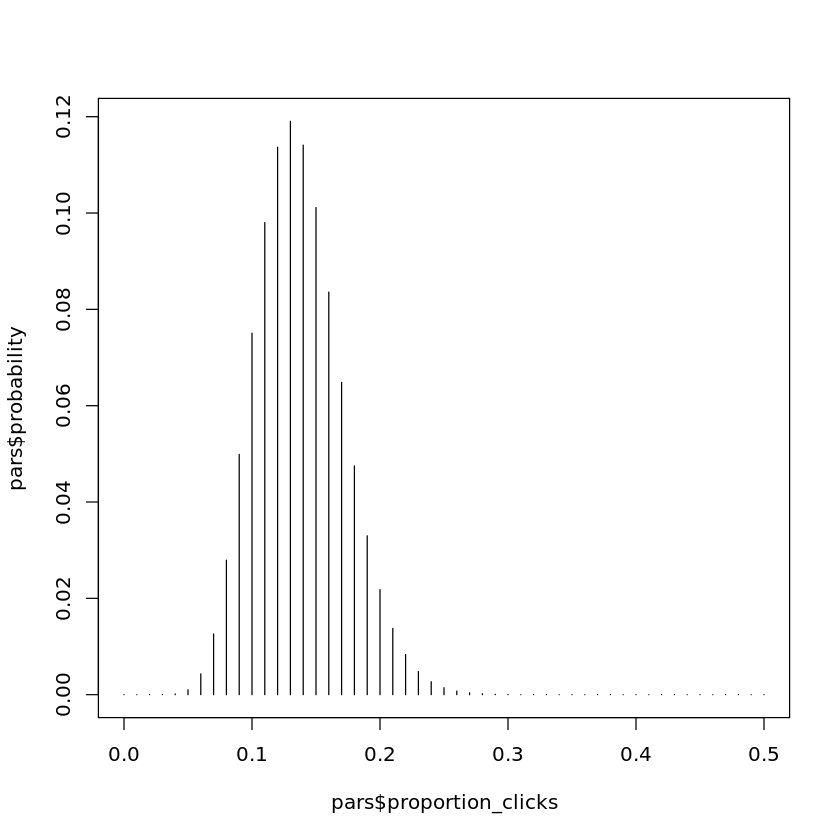

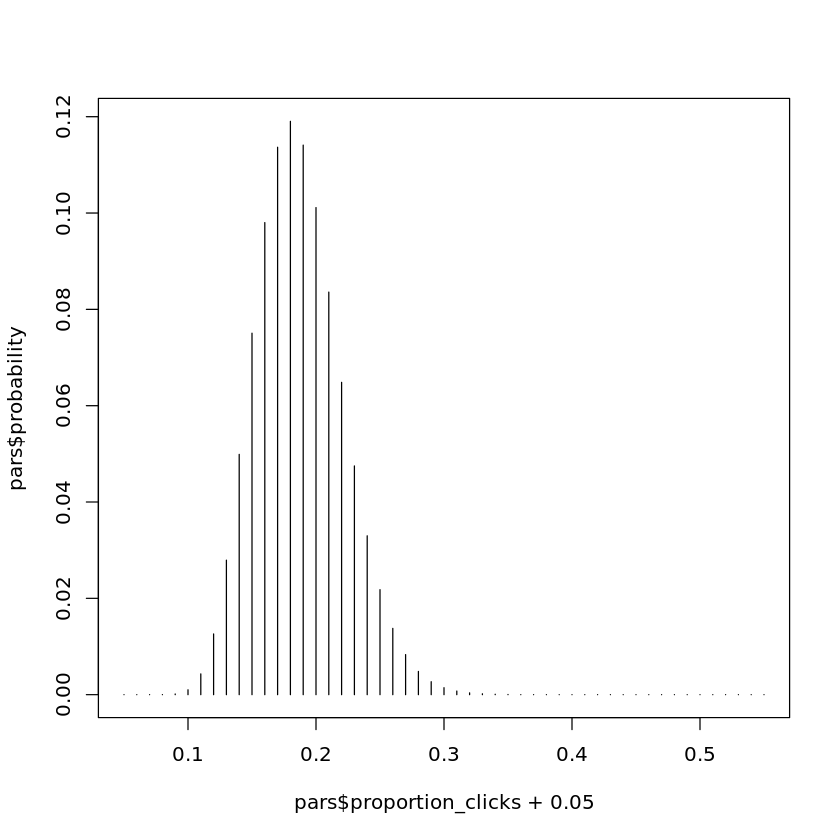

In [32]:
n_ads_shown <- 100
proportion_clicks <- seq(0, 0.5, by = 0.01)
n_visitors <- 13 # observed data
pars <- expand.grid(proportion_clicks = proportion_clicks,
                    n_visitors = n_visitors)
pars$prior <- dunif(pars$proportion_clicks, min = 0, max = 0.3)
pars$likelihood <- dbinom(pars$n_visitors, 
    size = n_ads_shown, prob = pars$proportion_clicks)
pars$probability <- pars$likelihood * pars$prior
pars$probability <- pars$probability / sum(pars$probability)

# Plot the posterior pars$probability
plot(pars$proportion_clicks, pars$probability, type="h")

## Real example - Bayesian normal model

In [4]:
# goal is to have an idea of the IQ of zombies
data <- c(55, 44, 34, 18, 51, 40, 40, 49, 48, 46)

pars <- expand.grid(mu = seq(0, 120, length.out = 100), 
                    sigma = seq(0.1, 30, length.out = 100))

pars$mu_prior <- dnorm(pars$mu, mean = 100, sd = 100)
pars$sigma_prior <- dunif(pars$sigma, min = 0.1, max = 50)
pars$prior <- pars$mu_prior * pars$sigma_prior

for(i in 1:nrow(pars)) {
  likelihoods <- dnorm(data, pars$mu[i], pars$sigma[i])
  pars$likelihood[i] <- prod(likelihoods)
}
# Calculate the probability of each parameter combination
pars$probability <- pars$likelihood * pars$prior / sum(pars$likelihood * pars$prior)

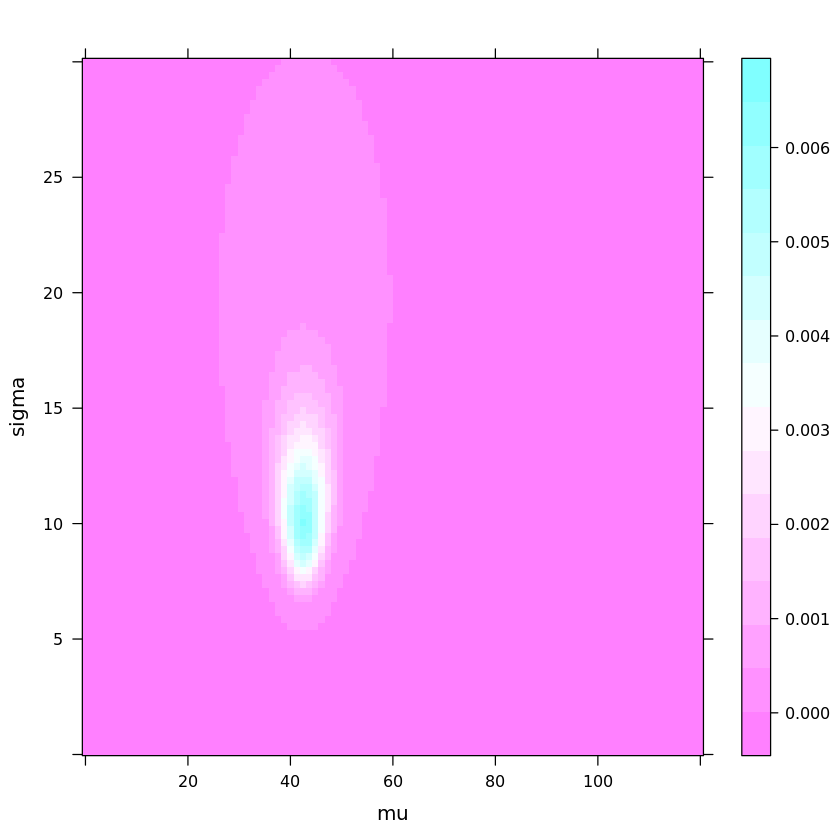

In [13]:
library(lattice)

levelplot(probability ~ mu * sigma, data=pars)

mu,sigma,mu_prior,sigma_prior,prior,likelihood,probability
0.000000,0.1,0.002419707,0.02004008,4.849113e-05,0,0
1.212121,0.1,0.002449036,0.02004008,4.907887e-05,0,0
2.424242,0.1,0.002478355,0.02004008,4.966644e-05,0,0
3.636364,0.1,0.002507657,0.02004008,5.025366e-05,0,0
4.848485,0.1,0.002536933,0.02004008,5.084035e-05,0,0
6.060606,0.1,0.002566174,0.02004008,5.142633e-05,0,0


[1] 7145 3537 5834 3336 3233 6433

2.5%      50%    97.5% 
35.15152 42.42424 50.90909

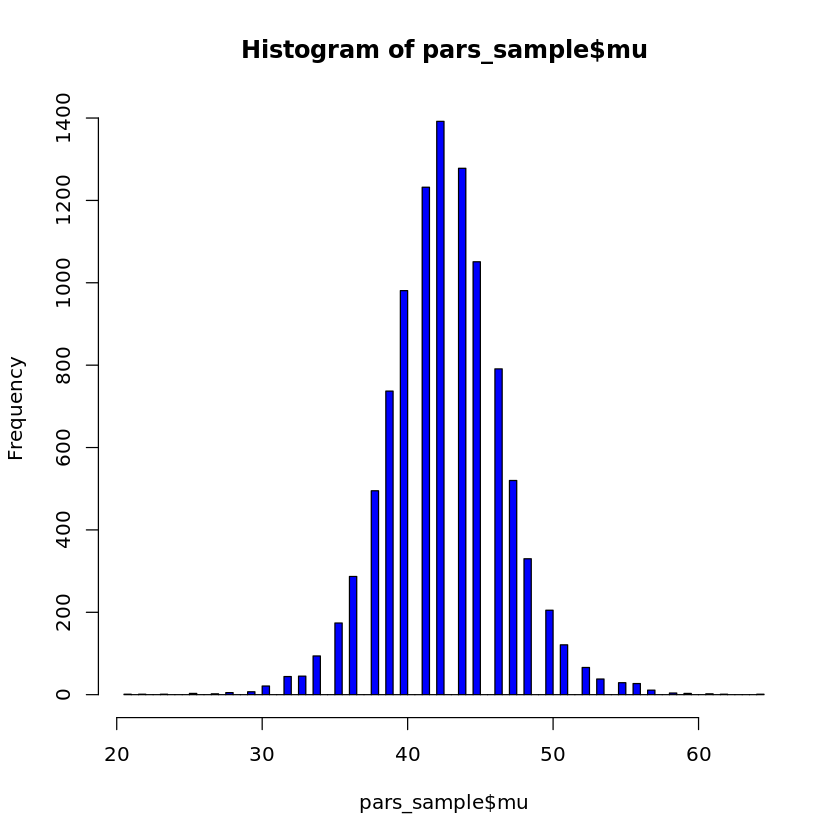

In [14]:
head(pars)
sample_indices <- sample( nrow(pars), size = 10000,
    replace = TRUE, prob = pars$probability)
head(sample_indices)

# Sample from pars to calculate some new measures
pars_sample <- pars[sample_indices, c("mu", "sigma")]

# Visualize the mean IQ
hist(pars_sample$mu, 100, col = 'blue')

# Calculate quantiles
quantile(pars_sample$mu, c(0.025,0.5, 0.975))

,mu,sigma
7145,53.33333,21.543434
3537,43.63636,10.670707
5834,40.00000,17.617172
3336,42.42424,10.066667
3233,38.78788,9.764646
6433,38.78788,19.429293


[1] 0.0877

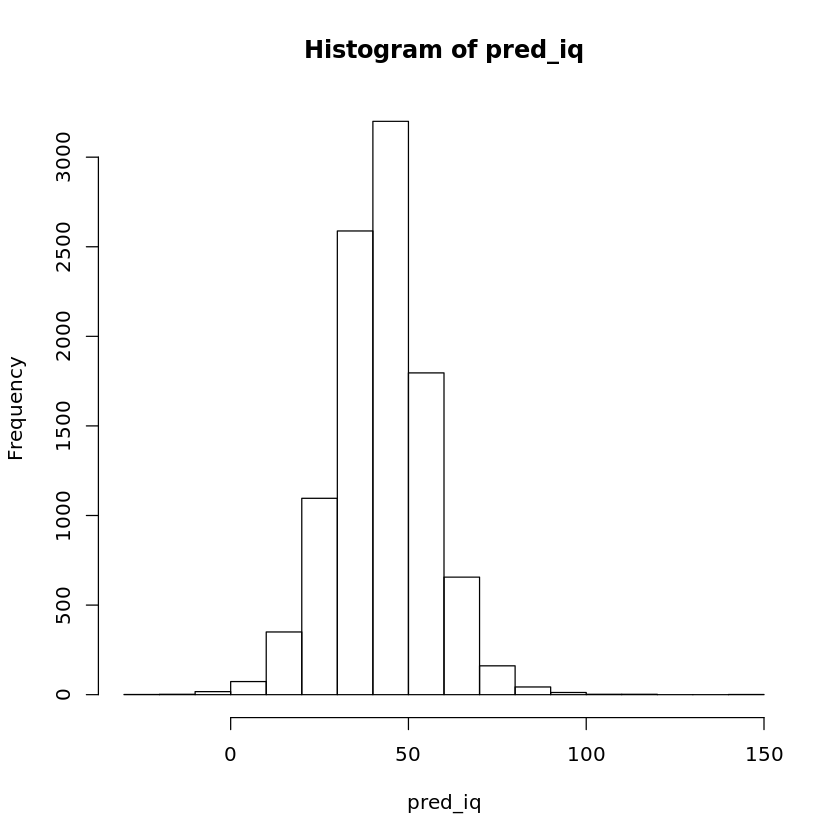

In [15]:
head(pars_sample)
pred_iq <- rnorm(10000, mean = pars_sample$mu, 
                 sd = pars_sample$sigma)

# Visualize pred_iq
hist(pred_iq)

# Calculate the probability of a zombie being "smart" (+60 IQ)
mean(pred_iq>60)